# TP4

In [223]:
import numpy as np
import pandas as pd
from sklearn import datasets
import math
from sklearn.metrics.pairwise import euclidean_distances 
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# K-Moyennes

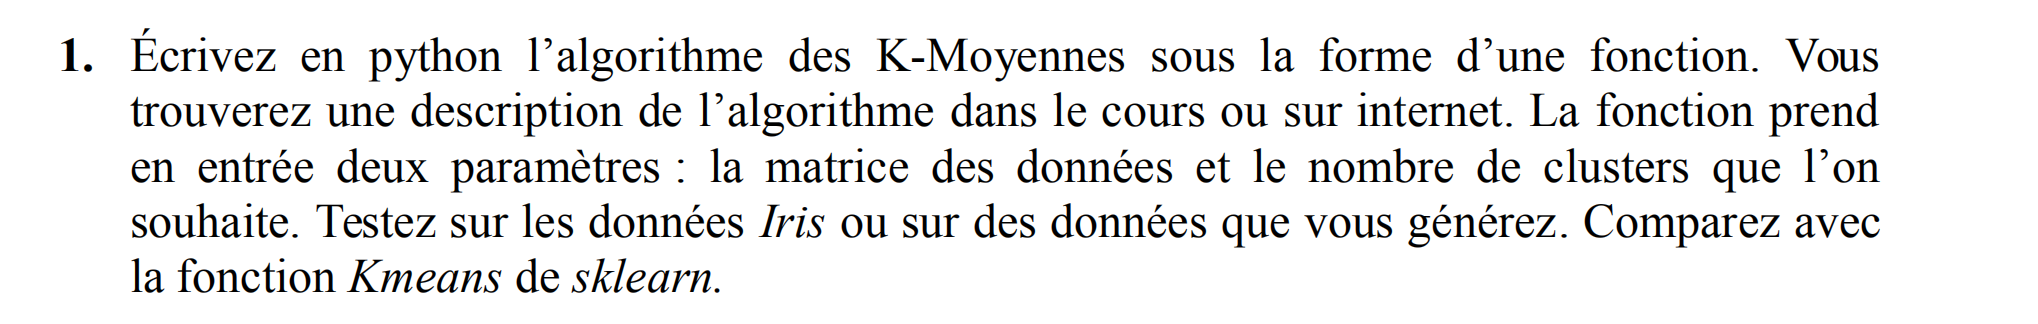

In [321]:
def K_Moyennes(x , k):
    clusters = {}
    Data=[]
    labels=[]
    Centroids=x[np.random.choice(range(len(x)), size=k, replace=False)]

    

    #distortion
    Dm=0
    Dm_1=0
    while True:
        for i in range(k):
            clusters[i] = [] 
            
        for e in x:
            distances = []
            for center in Centroids:

                distances.append( euclidean_distances( [e] , [center]) )

            Dm+=distances[np.argmin(distances)]

            clusters[np.argmin(distances)].append(e.tolist())    
        Dm=Dm/len(x)
        for [dm] in Dm:
            Dm=dm
            
        Centroids =  [np.array(clusters[c]).mean(0) for c in clusters]
        
        #print(abs((Dm_1 - Dm)/Dm))
        if abs((Dm_1 - Dm)/Dm) == 0:
            #print("i'am her")
            for c in range(len(clusters)):
                for i in clusters[c]:
                    labels.append(c)
                    Data.append(i)
            Data=np.array(Data)
            
            return clusters,Data,labels
            
        Dm_1=Dm
        Dm=0
        
    for c in range(len(clusters)):
        for i in clusters[c]:
            labels.append(c)
            Data.append(i)
    Data=np.array(Data)
     
    return clusters,Data,labels


In [225]:
iris = datasets.load_iris()

In [328]:
c,d,l = K_Moyennes(iris.data , 3)

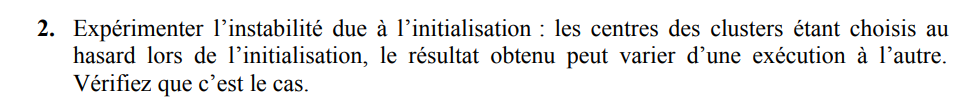

In [318]:
Data = []
labels = []

for cl in range(len(c)):
        for i in c[cl]:
            labels.append(cl)
            Data.append(i)
            
Data = np.array(Data)

# NB: D'après des executions successives on remarque que les resultats changes car les valeurs initials varies d'une fois a l'autres

Text(0.5, 1.0, 'Affichage des Clusters')

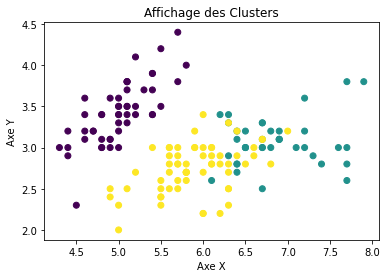

In [152]:
plt.scatter(d[:,0],d[:,1],c=l)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Affichage des Clusters") 

Text(0.5, 1.0, 'Affichage des Clusters')

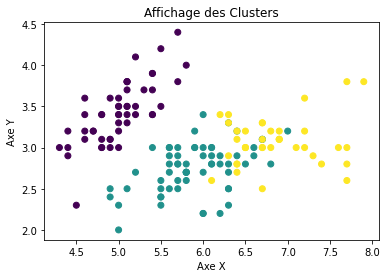

In [330]:
plt.scatter(d[:,0],d[:,1],c=l)
axes = plt.gca()
plt.ylabel('Axe Y')
plt.xlabel('Axe X')
plt.title("Affichage des Clusters") 

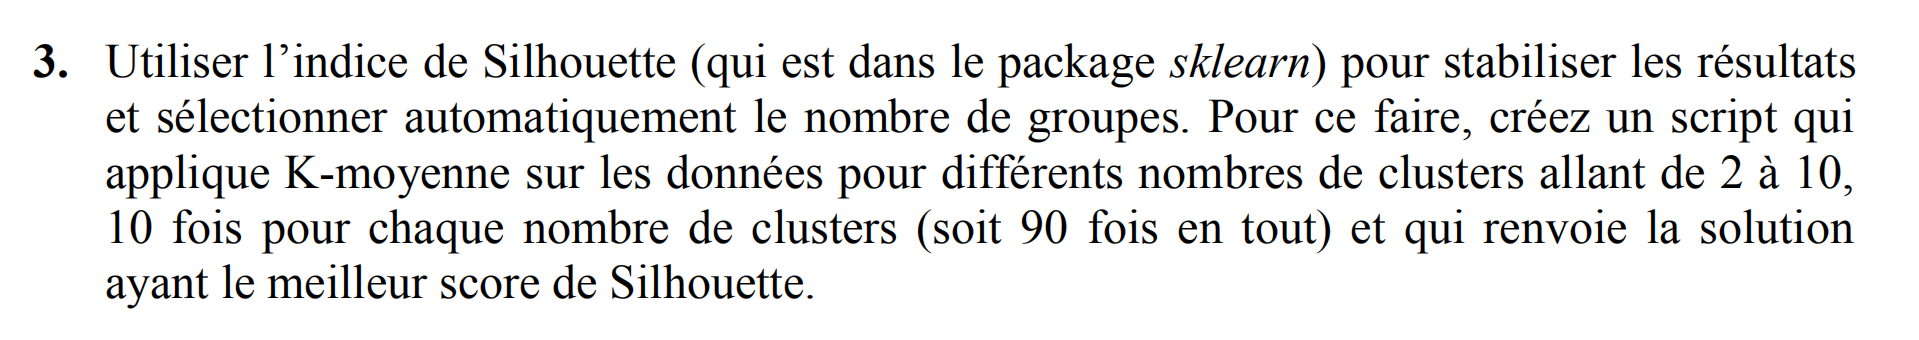

In [ ]:
X=iris.data
silhouette = []
nbr_Clusters = range(2,11)
for k in nbr_Clusters:
    for fois in range(10):
        
        c,d,l = K_Moyennes(iris.data , k)
        silhouette.append(silhouette_score(iris.data  , l))

#print(nbr_Clusters[np.argmax(silhouette)])

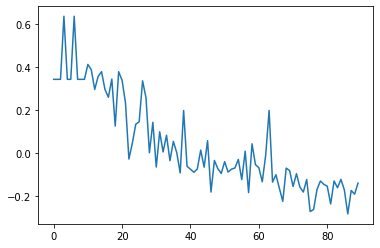

In [336]:
plt.plot(range(0,90) ,silhouette)

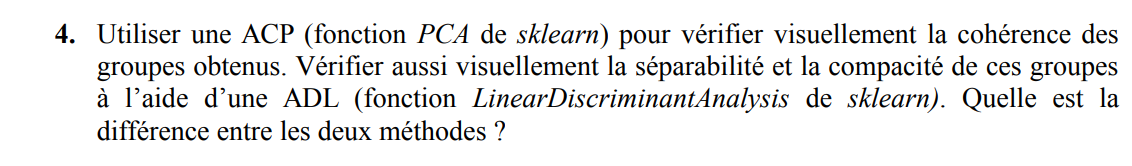

Text(0.5, 1.0, 'LDA of IRIS dataset')

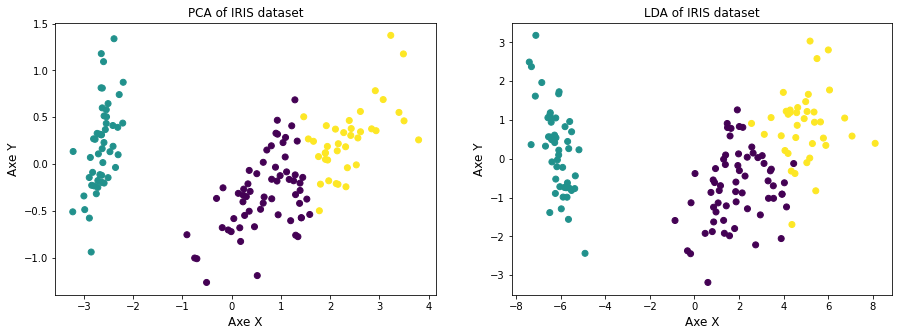

In [241]:
X = Data
y = labels


lda = LDA()
fitLDA = lda.fit(X, y)
Iris_LDA = fitLDA.transform(X)

pca = PCA()
fitPCA = pca.fit(X, y)
Iris_PCA = fitPCA.transform(X)


fig,axis=plt.subplots(1,2,figsize=(15,5))
axes=axis.reshape(2,)


axes[0].scatter(Iris_PCA[:, 0], Iris_PCA[:, 1], c=y)
axes[0].set_xlabel("Axe X", fontsize=12)
axes[0].set_ylabel("Axe Y", fontsize=12)
axes[0].set_title('PCA of IRIS dataset')


axes[1].scatter(Iris_LDA[:, 0], Iris_LDA[:, 1], c=y)
axes[1].set_xlabel("Axe X", fontsize=12)
axes[1].set_ylabel("Axe Y", fontsize=12)
axes[1].set_title('LDA of IRIS dataset')

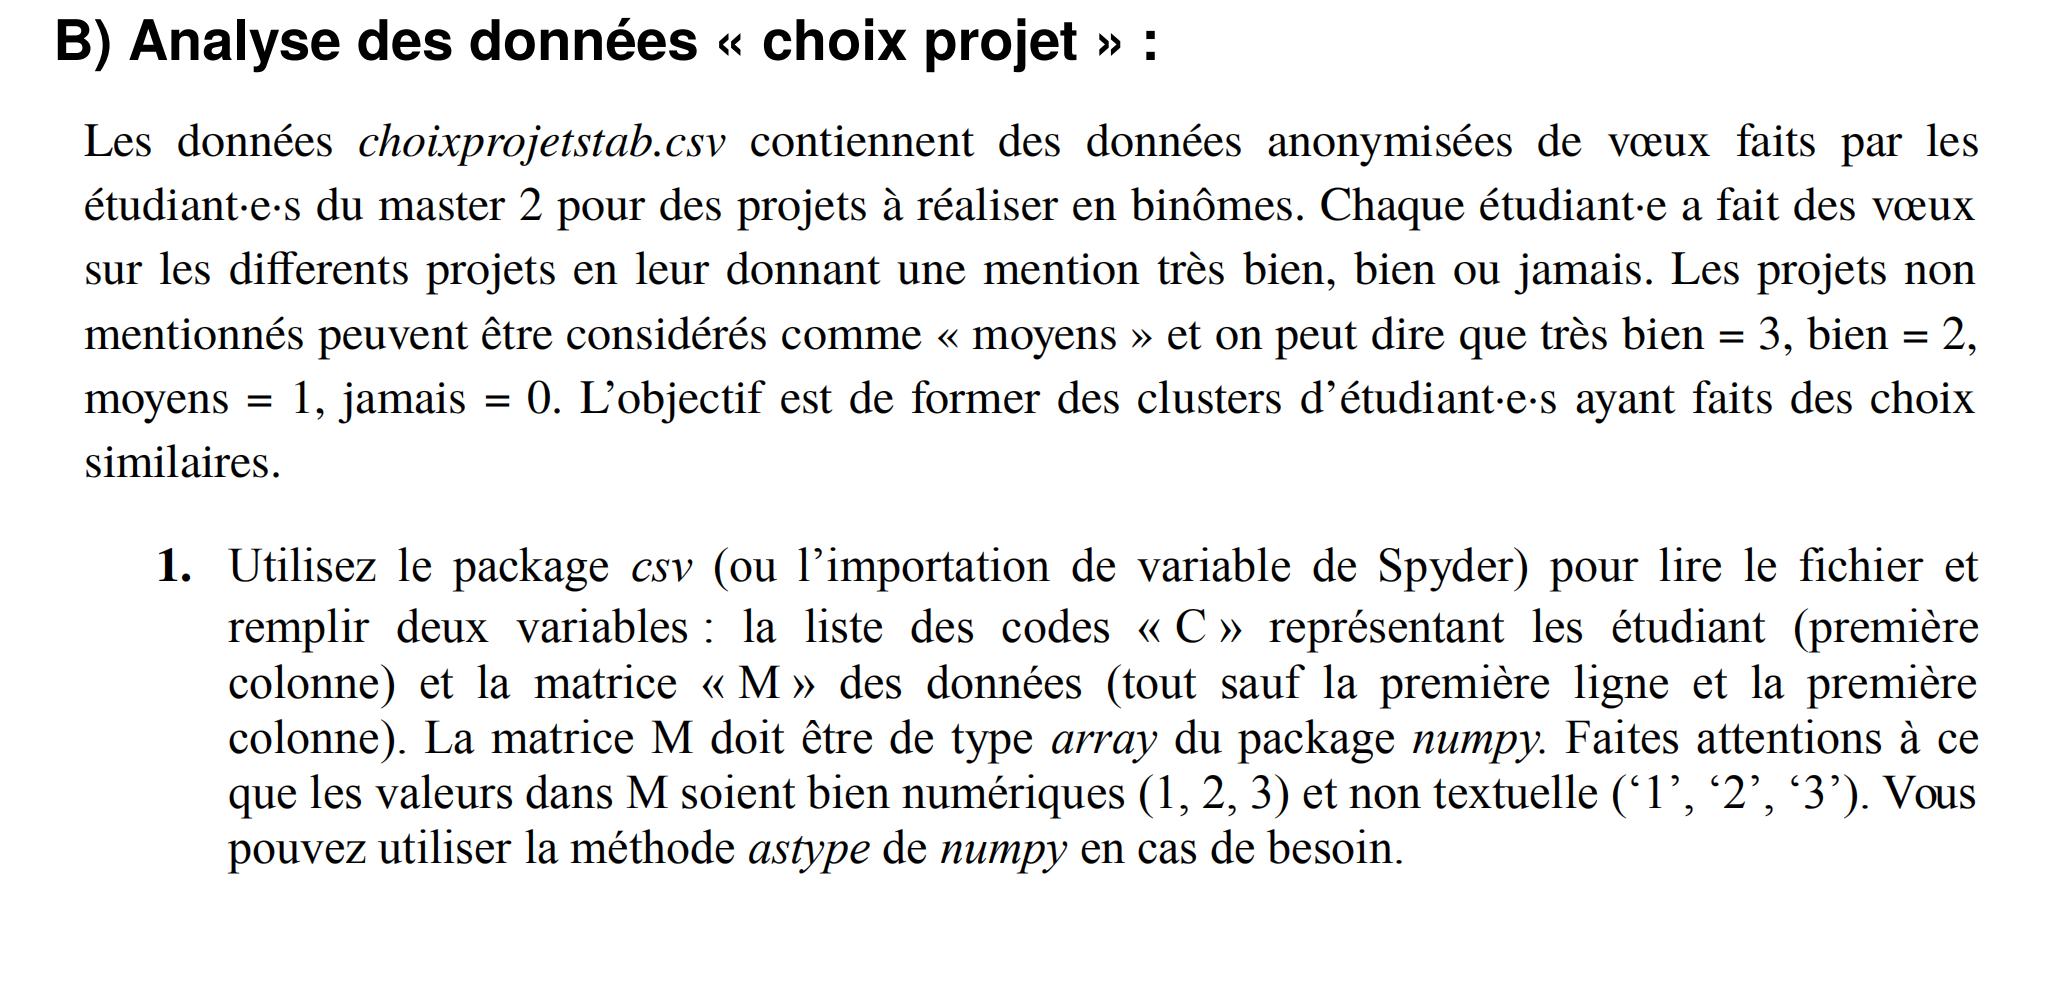

In [242]:
dataFrame = pd.read_csv('C:/Users/AmineKassimi/Documents/Data_Mining_TPs/choixprojetstab.csv',sep = ";").to_numpy()
dataFrame

array([['bl/.vSDYCGrSs', 1, 1, ..., 1, 1, 3],
       ['bl/1NiMubceBs', 1, 1, ..., 1, 1, 1],
       ['bl/dvgMTLVSvk', 0, 0, ..., 1, 0, 0],
       ...,
       ['bly3Oqsvf6WlU', 1, 1, ..., 1, 0, 2],
       ['bly69tf4z1FiM', 1, 1, ..., 1, 1, 1],
       ['blzon470EHguA', 1, 1, ..., 0, 1, 1]], dtype=object)

In [244]:
dataFrame.shape

(71, 81)

In [249]:
newData=dataFrame[:,1:]

In [254]:
np.unique(dataFrame[:,80:])

array([0, 1, 2, 3], dtype=object)

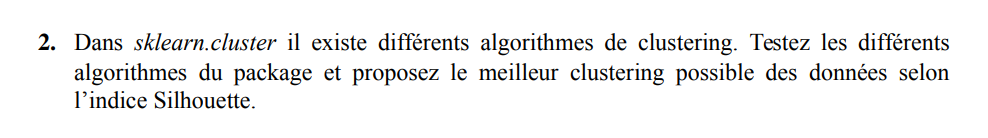

In [247]:
from sklearn.cluster import KMeans,MeanShift,AgglomerativeClustering

[0 1 2 1 2 1 1 1 0 1 1 3 2 1 1 1 2 1 2 1 1 1 2 0 1 1 1 1 1 1 1 2 1 3 1 2 1
 2 1 1 3 1 1 1 0 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 3 2 1 1 1 1 1]
[3 2 1 2 1 0 0 2 3 2 2 0 1 2 2 2 1 2 1 2 2 0 1 3 2 2 2 2 2 2 2 1 2 0 2 1 2
 1 0 2 0 2 2 2 3 1 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 0 2 0 1 2 2 0 2 2]
[ 2  0  1  0  7 10  3  0  2  0  0  6  5  0  0  0  1  0  7  0  0  3  1  2
  0  0  0  0  0  0  0  8  0  6  0  8  0  1 14  0  4  0  0  0  2  5  0  0
  0  0  0  0 11  0  0 12  0  0  0  0  1  0 13  0  4  1  0  0  9  0  0]

*** les scores silhouette pour tous les models :
 [0.29958429496509337, 0.2884593801353125, 0.411181596677861]

*** le meilleur models est : MeanShift()

 ___________________________________________________________________


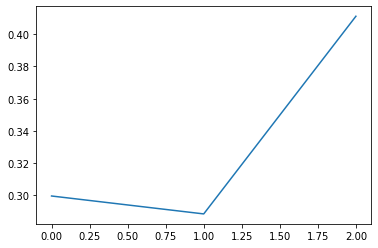

In [261]:
silhouette = []

models=[KMeans(n_clusters=4),AgglomerativeClustering(n_clusters=4),MeanShift()]

for model in models:
    fited_Model = model.fit(newData).labels_
    silhouette.append(silhouette_score(newData , fited_Model))
    print(fited_Model)
    
print("\n*** les scores silhouette pour tous les models :\n",silhouette)
print("\n*** le meilleur models est :",models[np.argmax(silhouette)])
print("\n ___________________________________________________________________")
plt.plot(range(0 , 3) ,silhouette)

In [351]:
from sklearn.preprocessing import scale, MinMaxScaler
X = np.array([[1, -1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
normalizedX2 = scaler.fit(X)
normalizedX2=normalizedX2.transform(X)

normalizedX2

array([[0.        , 0.        ],
       [0.2       , 0.90909091],
       [0.4       , 1.        ],
       [0.6       , 0.90909091],
       [0.8       , 0.81818182],
       [1.        , 0.90909091]])

In [356]:
import numpy as np
from sklearn.decomposition import NMF


model = NMF( init='random', random_state=0)
W = model.fit_transform(normalizedX2)
H = model.components_
H

array([[0.73020689, 0.34887863],
       [0.29597152, 1.34375256]])